### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [2]:
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

In [3]:
loja_final = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
loja_final

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4


In [4]:
faturamento_lojas = loja_final.groupby('Loja')['Preço'].sum()
faturamento_lojas

,Preço
Loja,
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


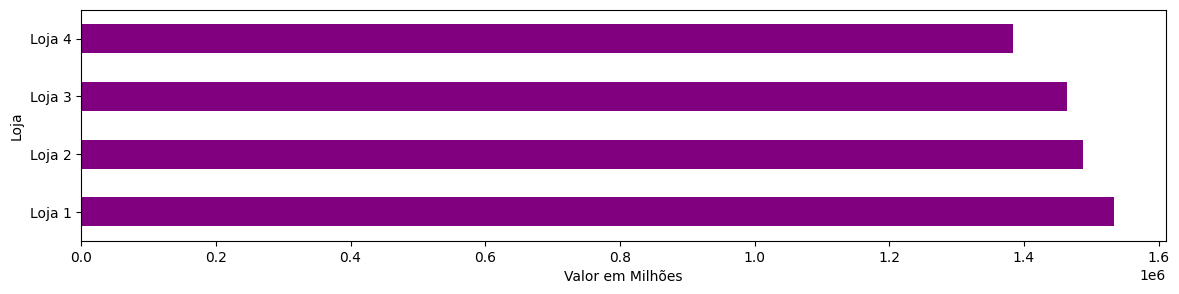

In [5]:
faturamento_lojas.plot(kind='barh', figsize=(14, 3), color ='green', xlabel = 'Valor em Milhões');

# 2. Vendas por Categoria

In [13]:
categoria_pop = loja_final.groupby(['Loja','Categoria do Produto']).size().reset_index(name='Quantidade').sort_values(['Loja','Quantidade'], ascending=[True,False]).groupby('Loja').head(3)
categoria_pop

,Loja,Categoria do Produto,Quantidade
6,Loja 1,moveis,465
2,Loja 1,eletronicos,448
0,Loja 1,brinquedos,324
14,Loja 2,moveis,442
10,Loja 2,eletronicos,422
8,Loja 2,brinquedos,313
22,Loja 3,moveis,499
18,Loja 3,eletronicos,451
16,Loja 3,brinquedos,315
30,Loja 4,moveis,480


<Axes: xlabel='Quantidade de Vendas', ylabel='Loja'>

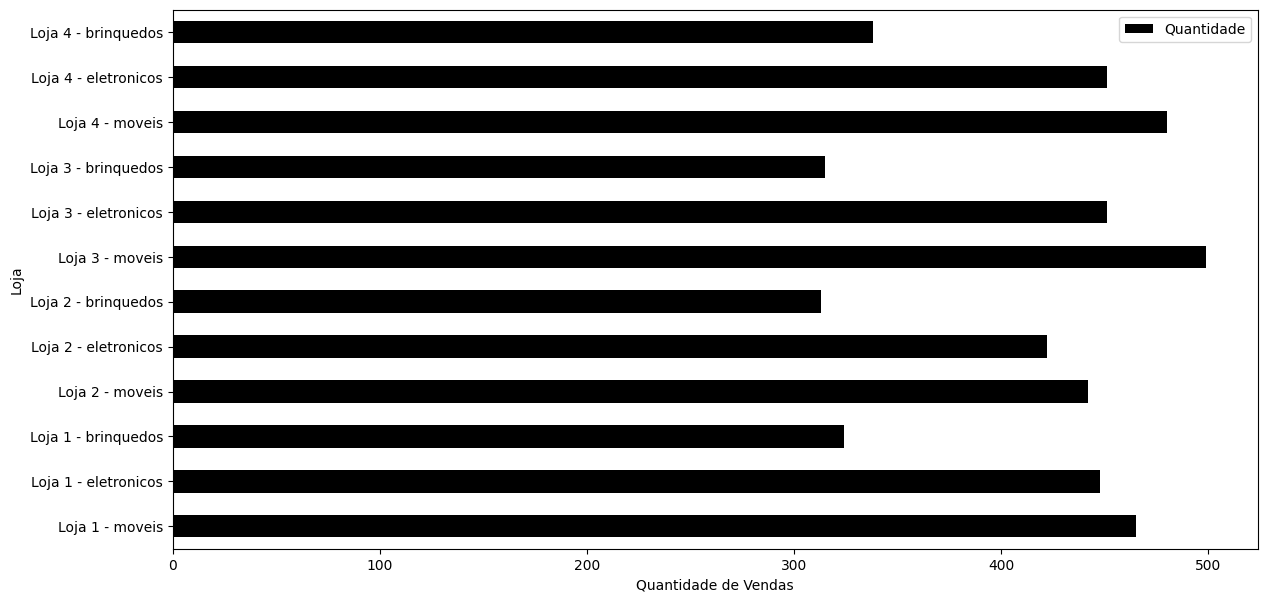

In [7]:
categoria_pop.assign(Loja_Categoria=lambda x: x['Loja'] + ' - ' + x['Categoria do Produto']).set_index('Loja_Categoria').plot(kind='barh', figsize=(14,7), color='green', ylabel='Loja', xlabel='Quantidade de Vendas')

# 3. Média de Avaliação das Lojas


In [8]:
media_avaliacao = loja_final.groupby('Loja', as_index=False)['Avaliação da compra'].mean()
media_avaliacao

,Loja,Avaliação da compra
0,Loja 1,3.976685
1,Loja 2,4.037304
2,Loja 3,4.048326
3,Loja 4,3.995759


<Axes: ylabel='Loja'>

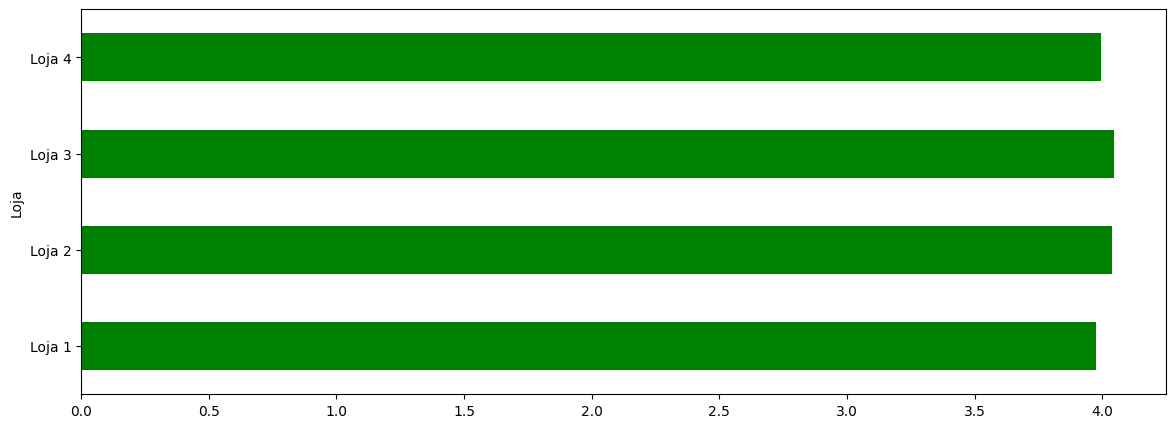

In [9]:
media_avaliacao.set_index('Loja')['Avaliação da compra'].plot(kind='barh', figsize=(14,5), color='green', ylabel='Loja')


# 4. Produtos Mais e Menos Vendidos

In [10]:
mais_vendido = loja_final.groupby(['Loja','Produto']).size().reset_index(name='Quantidade').sort_values(['Loja','Quantidade'], ascending=[True,False]).groupby('Loja').head(1)
mais_vendido

,Loja,Produto,Quantidade
24,Loja 1,Guarda roupas,60
79,Loja 2,Iniciando em programação,65
134,Loja 3,Kit banquetas,57
161,Loja 4,Cama box,62


In [11]:
menos_vendido = loja_final.groupby(['Loja','Produto']).size().reset_index(name='Quantidade').sort_values(['Loja','Quantidade'], ascending=[True,True]).groupby('Loja').head(1)
menos_vendido

,Loja,Produto,Quantidade
11,Loja 1,Celular ABXY,33
82,Loja 2,Jogo de tabuleiro,32
105,Loja 3,Blocos de montar,35
178,Loja 4,Guitarra,33


# 5. Frete Médio por Loja

In [12]:
frete_medio = loja_final.groupby('Loja')['Frete'].mean()
frete_medio

,Frete
Loja,
Loja 1,34.691805
Loja 2,33.621941
Loja 3,33.074464
Loja 4,31.278997


## Relatório

Avaliando o desempenho das quatro lojas análisadas, levamos em consideração os seguintes pontos:



*   Faturamento total por loja
*   Categoria mais popular
*   Média de avaliação dos clientes
*   Produtos mais populares e menos populares
*   Custo médio de frete





1.   A Loja 1 gera a maior receita bruta dentre todas as outras, num valor de R$1.534.509,12, com uma diferença de quase R$200.000,00 ultima da lista, Loja 4.

2.   As categorias mais populares se encaixam em todas as quatro lojas, sendo elas Móveis, eletrônicos e brinquedos, sendo que a Loja 4 é a que mais vende em todas as três categorias mais populares.

3.   As melhores avaliações dos clientes pertencem a Loja 3, Loja 2, Loja 4 e por ultimo, Loja 1. Porém todas com diferenças mínimas, ao redor da nota 4.

4.   Todas as lojas possuem produtos mais vendidos com quantidades similares, de (57 à 65 unidades), e quanto aos produtos menos vendidos, existe pouquissima variação.

5. O custo médio do frete de cada loja, varia entre R$31,28 e R$34,69, sendo esses valores respectivamente da Loja 4, e da Loja 1.

Dados os fatos, recomendo a venda da Loja 4 devido aos seguintes fatores:

*   É a loja de menor faturamento
*   Tem uma avaliação mediana, se comparada às outras lojas
*   Mesmo com um melhor custo de frete, não compensa a baixa receita

A longo prazo, a Loja 4 é a loja menos valiosa, e a mais indicada para ser vendida.





